# A Tutorial Introduction to BeautifulSoup
### Jiang Shang

## (1) Motivation - one paragraph explaining the main objective of the library and the problem it is trying to solve

BeautifulSoup is a Python library for pulling data out of HTML and XML files [1]. 

Beautiful Soup transforms a complex HTML document into a tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: Tag, NavigableString, BeautifulSoup, and Comment [4].

The principle by which it works is that it can turn even invalid markup into a parse tree and thus perform navigating, searching, and modifying [2]. It is a toolkit to dissect a docutment and find what you need fast. It can save programmers considerable amount of time. 

Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. You don't have to think about encodings, unless the document doesn't specify an encoding and Beautiful Soup can't detect one. Then you just have to specify the original encoding [3].

However, BeautifulSoup itself does not do page wrapping, which means it relies on other packages such as requests or urllib.request to read and wrap up the orignal content in a webpage.

The newst version currently available is BeautifulSoup 4

## (2) Context - alternative solutions for solving the problem

lxml and html(python's built-in library)

## (3) Installation instructions, platform restriction and dependent libraries

The current release is Beautiful Soup 4.5.3 (January 2, 2017). You can install Beautiful Soup 4 with pip install beautifulsoup4.

$ pip install beautifulsoup4

If you’re using a recent version of Debian or Ubuntu Linux, you can install Beautiful Soup with the system package manager:

$ apt-get install python-bs4

Beautiful Soup 4 is published through PyPi, so if you can’t install it with the system packager, you can install it with easy_install or pip. The package name is beautifulsoup4, and the same package works on Python 2 and Python 3.



$ easy_install beautifulsoup4

## (4) Minimal working example

In [21]:
from bs4 import BeautifulSoup
import requests

## (5) 2-3 examples of typical use-cases

### The following image a wikipedia page regarding panama papers. Now let's practice using BeautifulSoup to extract some information from this page

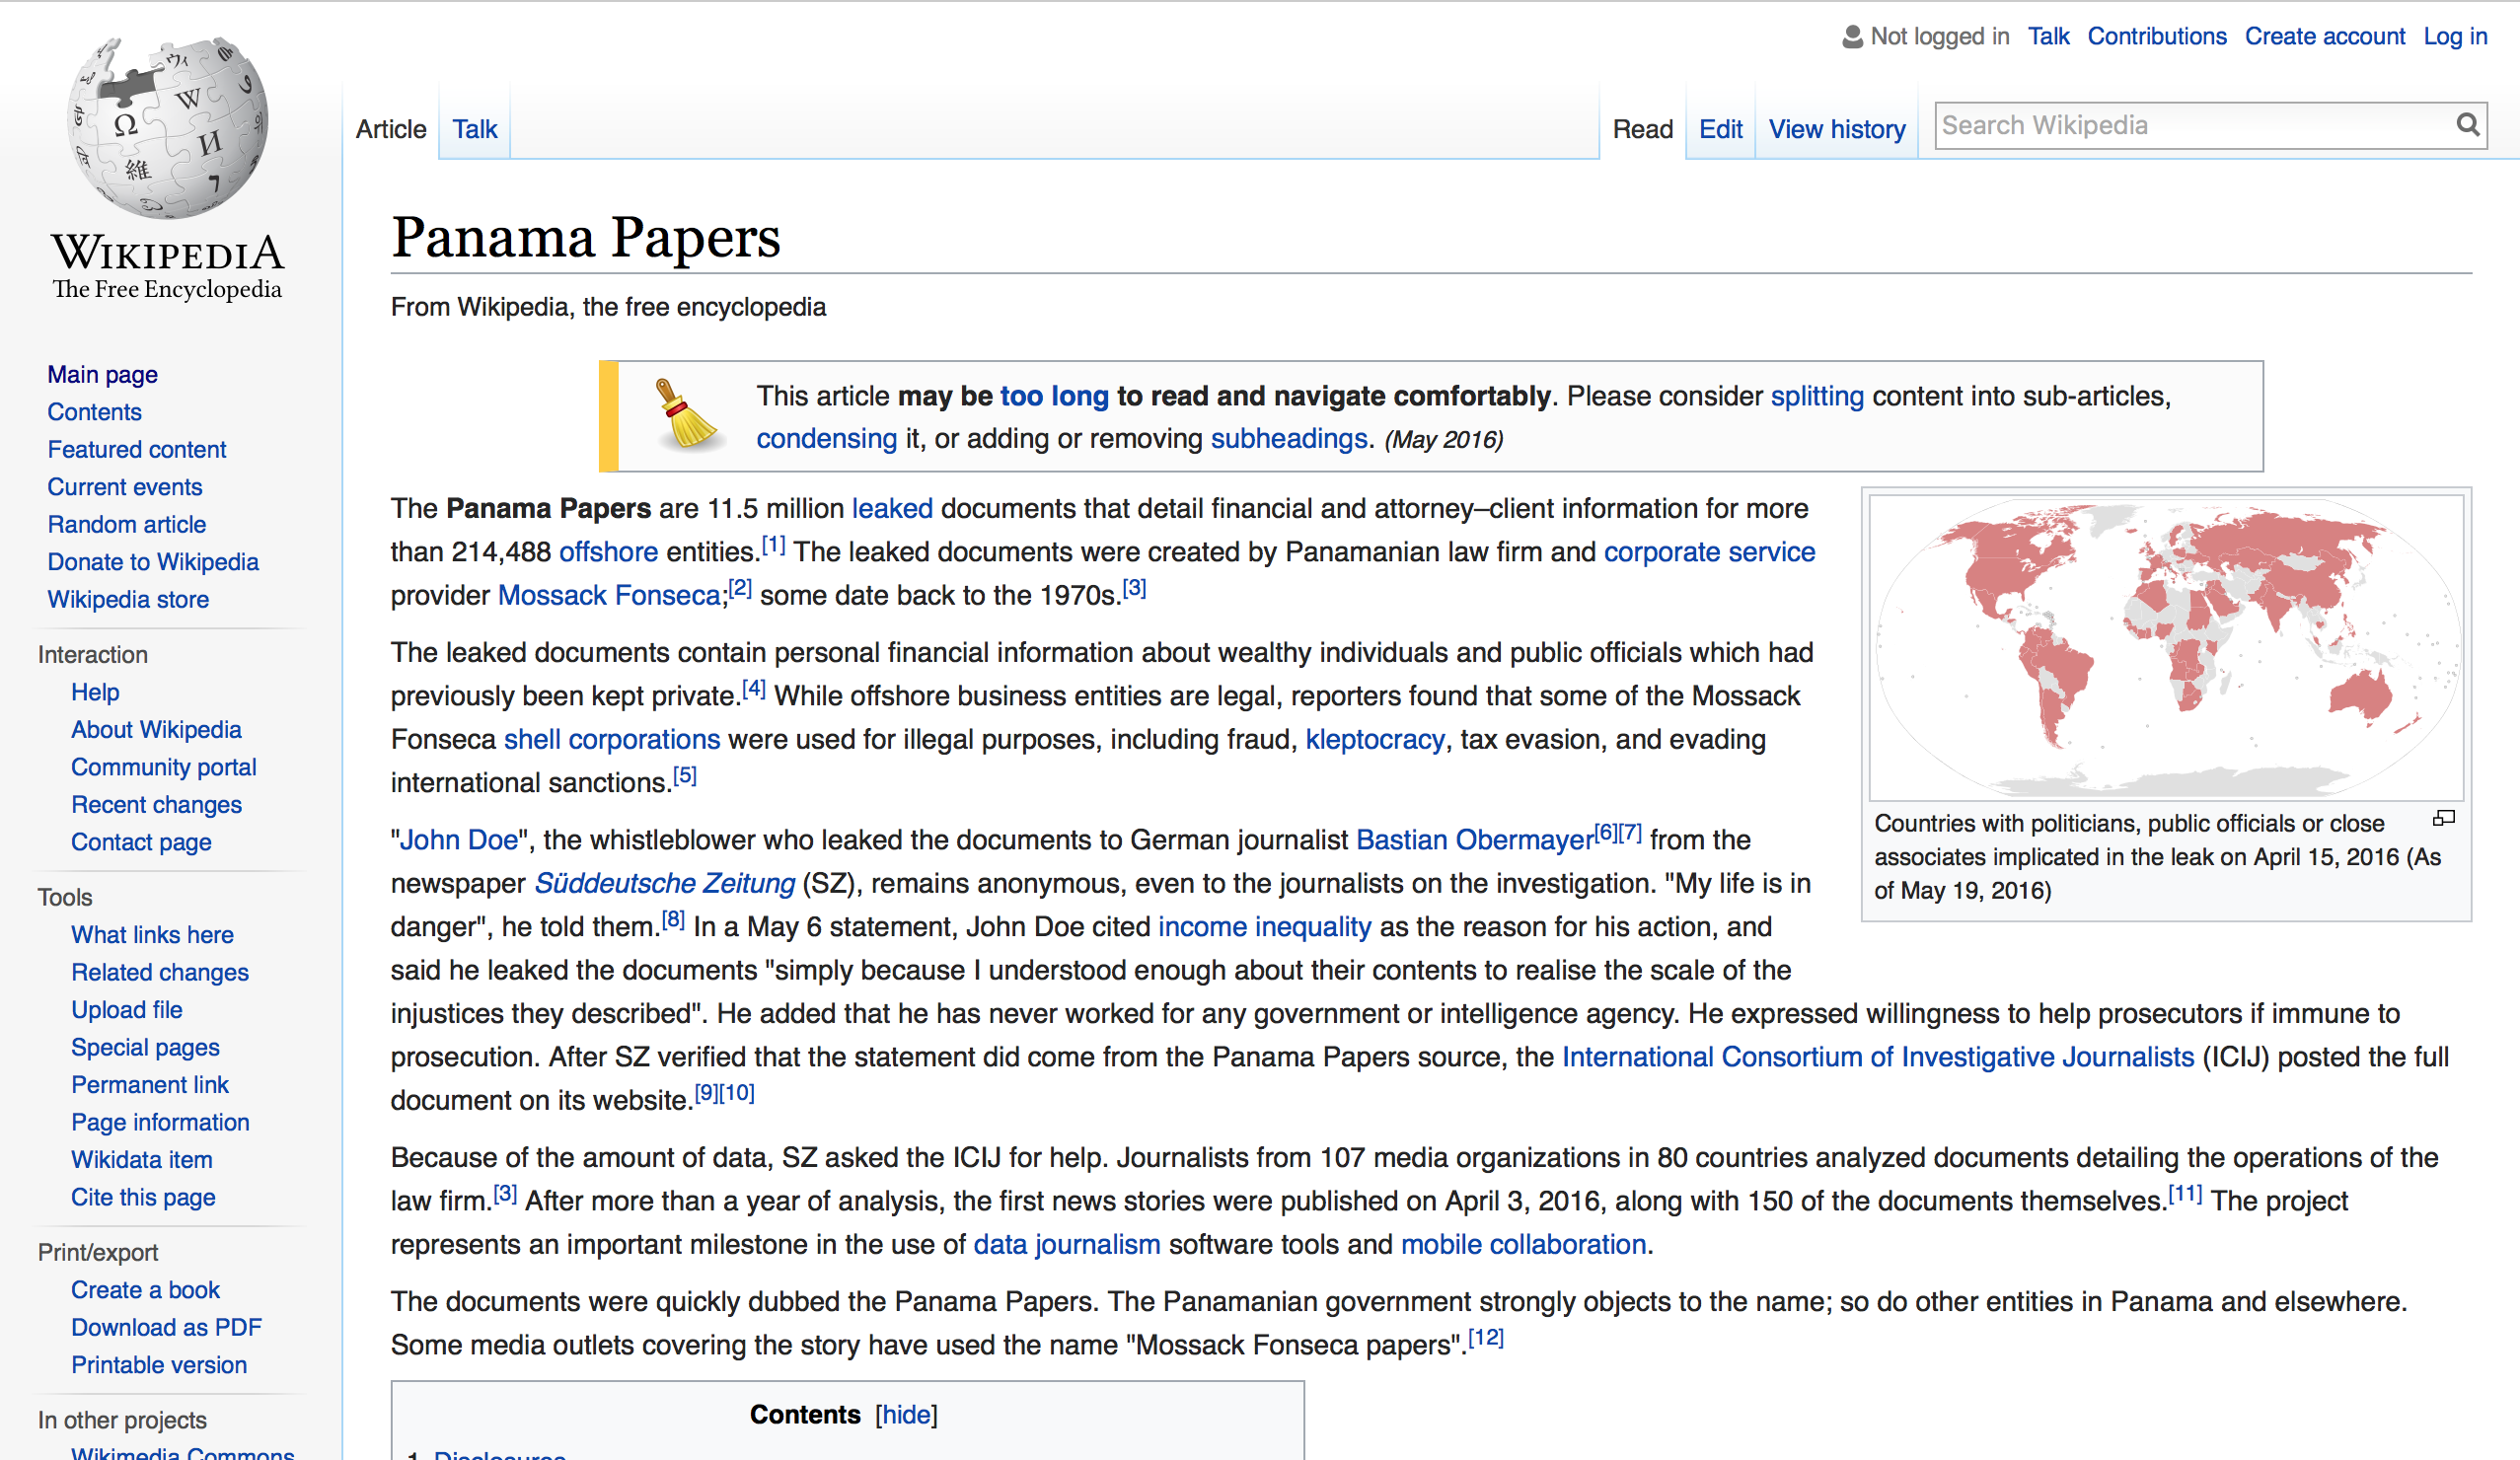

In [1]:
from IPython.display import Image
Image('Panama_Papers.png',width=580,height=500)

### First, let's use this package named requests to grab the content of this page

In [3]:
page=requests.get('https://en.wikipedia.org/wiki/Panama_Papers')

### Now we've had it, let's take a look at how this beautifully presented webpage really look like in its source code

In [4]:
page.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Panama Papers - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Panama_Papers","wgTitle":"Panama Papers","wgCurRevisionId":763217684,"wgRevisionId":763217684,"wgArticleId":50034356,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 French-language sources (fr)","CS1 German-language sources (de)","CS1 Spanish-language sources (es)","CS1 Norwegian-language sources (no)","CS1 Russian-language sources (ru)","CS1 maint: Multiple names: authors list","All articles with dead external links","Articles with dead external links from May 2016","CS1 

### Wow, this look just awful, imagine we have to read through this junk?

### Thanks to BeautifulSoup, we don't have to. Let's now make it look a little bit more pretty by first turning it into a BeautifulSoup object.

In [5]:
soup = BeautifulSoup(page.text,'html.parser')

In [6]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Panama Papers - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Panama_Papers","wgTitle":"Panama Papers","wgCurRevisionId":763217684,"wgRevisionId":763217684,"wgArticleId":50034356,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 French-language sources (fr)","CS1 German-language sources (de)","CS1 Spanish-language sources (es)","CS1 Norwegian-language sources (no)","CS1 Russian-language sources (ru)","CS1 maint: Multiple names: authors list","All articles with dead external links","Articles with dead external links from May 2016","CS1 Swedish-l

### Now this looks much more organized, isn't it?

### Of course BeautifulSoup can be much more than this, it has many pre-defined functions calling which can get you what you want in an instant. A quintessential example is to get all the hyperlinks on the present page. We can acheive this by using the find_all( ) function. Notice that the reason we can do this is becuase for html file, every hyperlink is taged with the < a > tag. The find_all( ) method looks through a tag’s descendants and retrieves all descendants that match your filters [4].

In [9]:
findings=soup.find_all('a')
findings

[<a id="top"></a>,
 <a href="#mw-head">navigation</a>,
 <a href="#p-search">search</a>,
 <a href="/wiki/Wikipedia:Article_size" title="Wikipedia:Article size">too long</a>,
 <a href="/wiki/Wikipedia:Splitting" title="Wikipedia:Splitting">splitting</a>,
 <a href="/wiki/Wikipedia:Summary_style" title="Wikipedia:Summary style">condensing</a>,
 <a href="/wiki/Help:Section#Subsections" title="Help:Section">subheadings</a>,
 <a class="image" href="/wiki/File:Countries_implicated_in_the_Panama_Papers.svg"><img alt="" class="thumbimage" data-file-height="443" data-file-width="863" height="154" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/40/Countries_implicated_in_the_Panama_Papers.svg/300px-Countries_implicated_in_the_Panama_Papers.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/40/Countries_implicated_in_the_Panama_Papers.svg/450px-Countries_implicated_in_the_Panama_Papers.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/40/Countries_implicated_in_the

In [7]:
'''Notice that we can modify our desired number of output by adjusting the parameter limit. By setting limit=7, we are
telling the computer we just want 7 outputs and that's enough. The find_all( ) function will then return the first 7
a taged links to us'''

soup.find_all('a',limit=7)

[<a id="top"></a>,
 <a href="#mw-head">navigation</a>,
 <a href="#p-search">search</a>,
 <a href="/wiki/Wikipedia:Article_size" title="Wikipedia:Article size">too long</a>,
 <a href="/wiki/Wikipedia:Splitting" title="Wikipedia:Splitting">splitting</a>,
 <a href="/wiki/Wikipedia:Summary_style" title="Wikipedia:Summary style">condensing</a>,
 <a href="/wiki/Help:Section#Subsections" title="Help:Section">subheadings</a>]

### We are not done yet. The above findings shows a lot of other information we just don't care at this point. All we want is just pure links. We then write a for loop to iterate through each line looking for attribute "href" with a get function. 

In [20]:
for line in findings:
    
    temp=line.get('href')
    
    if temp == None:
        pass
    
    elif temp.startswith('#'):
        print('https://en.wikipedia.org/wiki/Panama_Papers'+temp)
    
    elif temp.startswith('/'):
        print('https://en.wikipedia.org'+temp)
    
    else:
        print(temp)
   

https://en.wikipedia.org/wiki/Panama_Papers#mw-head
https://en.wikipedia.org/wiki/Panama_Papers#p-search
https://en.wikipedia.org/wiki/Wikipedia:Article_size
https://en.wikipedia.org/wiki/Wikipedia:Splitting
https://en.wikipedia.org/wiki/Wikipedia:Summary_style
https://en.wikipedia.org/wiki/Help:Section#Subsections
https://en.wikipedia.org/wiki/File:Countries_implicated_in_the_Panama_Papers.svg
https://en.wikipedia.org/wiki/File:Countries_implicated_in_the_Panama_Papers.svg
https://en.wikipedia.org/wiki/Data_breach
https://en.wikipedia.org/wiki/Offshore_tax_haven
https://en.wikipedia.org/wiki/Panama_Papers#cite_note-OCCRP_Giant_leak-1
https://en.wikipedia.org/wiki/Corporate_services
https://en.wikipedia.org/wiki/Mossack_Fonseca
https://en.wikipedia.org/wiki/Panama_Papers#cite_note-2
https://en.wikipedia.org/wiki/Panama_Papers#cite_note-Guardian:_how_the_rich-3
https://en.wikipedia.org/wiki/Panama_Papers#cite_note-4
https://en.wikipedia.org/wiki/Shell_corporations
https://en.wikipedia.o

### Another common task is to extract all the text from the page, where get_text( ) function comes in handy.

In [17]:
print(soup.get_text())





Panama Papers - Wikipedia
document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Panama_Papers","wgTitle":"Panama Papers","wgCurRevisionId":763217684,"wgRevisionId":763217684,"wgArticleId":50034356,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 French-language sources (fr)","CS1 German-language sources (de)","CS1 Spanish-language sources (es)","CS1 Norwegian-language sources (no)","CS1 Russian-language sources (ru)","CS1 maint: Multiple names: authors list","All articles with dead external links","Articles with dead external links from May 2016","CS1 Swedish-language sources (sv)","CS1 maint: Unrecognized language","CS1 Chinese-language sources (zh)","Articles with Chinese-language extern

### It can also find all tables 

In [19]:
tables_all=soup.find_all('table')
tables_all

[<table class="plainlinks metadata ambox ambox-style ambox-very_long" role="presentation">
 <tr>
 <td class="mbox-image">
 <div style="width:52px"><img alt="" data-file-height="48" data-file-width="48" height="40" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f2/Edit-clear.svg/40px-Edit-clear.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f2/Edit-clear.svg/60px-Edit-clear.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f2/Edit-clear.svg/80px-Edit-clear.svg.png 2x" width="40"/></div>
 </td>
 <td class="mbox-text"><span class="mbox-text-span">This article <b>may be <a href="/wiki/Wikipedia:Article_size" title="Wikipedia:Article size">too long</a> to read and navigate comfortably</b>. <span class="hide-when-compact">Please consider <a href="/wiki/Wikipedia:Splitting" title="Wikipedia:Splitting">splitting</a> content into sub-articles, <a href="/wiki/Wikipedia:Summary_style" title="Wikipedia:Summary style">condensing</a> it, or adding or removing <a href="/wiki/H

### Or just find tables that suits our interest by passing in a value to the class attribute

In [160]:
tables=soup.find_all('table', class_="wikitable zebra")
tables

[<table class="wikitable zebra">
 <caption>Foundations firms 'offshore' customers through banks</caption>
 <tr>
 <th>Headquarters</th>
 <th>Bank</th>
 <th>Number of<br/>
 foundations</th>
 </tr>
 <tr>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" width="23"/> </span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
 <td>Experta Corporate &amp; Trust Services (100% subsidiary of <a href="/wiki/Banque_Internationale_%C3%A0_Luxembourg" title="Banque Internationale à Luxembourg">BIL</a>)</td>
 <td align="right">1659</td>
 </tr>
 <tr>
 <td><span class="flagicon"><im

## (6) List other interesting or useful features (additional examples are not required)

## (7) Summary and personal assessment of the library

A question arises when I use BeautifulSoup is that why not use regular expression? Since it seems that regex serves similar functions anyway. After researching, the answers boils down to speed versus robustness. Code written in BeautifulSoup is usually more robust than the one written using regular expressions while regex runs at a much faster speed than BeautifulSoup usually by a factor of 100 giving the same outcome [5]. 

To me personally, BeautifulSoup is much easier to learn and use than regular expression. The syntax it uses is much more concise and much less non-sensical. It provides simple ways to navigate the data structure and extract the information I need quickly. However, in order to use this package to its full potential, it is important that we also know the stucture of html, especially its tags and what each tag represents.

## (8) Reference

[1]	M. Dad, "Beautiful soup 4 python," Python For Beginners, 2016. [Online]. Available: http://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python. Accessed: Jan. 31, 2017.


[2] L. Richardson, "Beautiful soup documentation," in Crummy, 2013. [Online]. Available: https://www.crummy.com/software/BeautifulSoup/bs3/documentation.html. Accessed: Jan. 31, 2017.

[3] L. Richardson, "Beautiful Soup," in Crummy, 2017. [Online]. Available: https://www.crummy.com/software/BeautifulSoup/. Accessed: Jan. 31, 2017.

[4]	L. Richardson, "Beautiful Soup Documentation," in Crummy. [Online]. Available: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#. Accessed: Jan. 31, 2017.

[5] S. Ray, "Beginner’s guide to Web Scraping in Python (using BeautifulSoup)," in Analytics Vidhya, 2015. [Online]. Available: https://www.analyticsvidhya.com/blog/2015/10/beginner-guide-web-scraping-beautiful-soup-python/. Accessed: Jan. 31, 2017.